In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gender_guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 8.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.statespace.sarimax import SARIMAX
import gender_guesser.detector as gender

# **Customer & Product Analysis**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car Sales.xlsx - car_data.csv')


# Display the first few rows of the DataFrame to verify
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [6]:
df.nunique()

,0
Car_id,23906
Date,612
Customer Name,3021
Gender,2
Annual Income,2508
Dealer_Name,28
Company,30
Model,154
Engine,2
Transmission,2


**Gender Analysis**

In [7]:


d = gender.Detector()

def guess_gender(name):
    # Check if the input is a string before splitting
    if isinstance(name, str):
        first_name = name.split()[0]
        gen = d.get_gender(first_name)
        if gen in ['male', 'mostly_male']:
            return 'Male'
        elif gen in ['female', 'mostly_female']:
            return 'Female'
        else:
            return 'Unknown'
    else:
        # Handle non-string values (like floats)
        return 'Unknown'

df['Gender_Predicted'] = df['Customer Name'].apply(guess_gender)

# Kemudian replace gender yang mismatch dengan prediksi
df.loc[df['Gender'] != df['Gender_Predicted'], 'Gender'] = df['Gender_Predicted']

In [8]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Gender_Predicted
0,C_CND_000001,1/2/2022,Geraldine,Female,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Female
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Male
2,C_CND_000003,1/2/2022,Gianna,Female,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Female
3,C_CND_000004,1/2/2022,Giselle,Female,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Female
4,C_CND_000005,1/2/2022,Grace,Female,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,Male
23902,C_CND_023903,12/31/2023,Jimmy,Male,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,Male
23903,C_CND_023904,12/31/2023,Emma,Female,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,Female
23904,C_CND_023905,12/31/2023,Victoire,Female,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,Female


Gender Distribution:
Gender
Male       10665
Female     10279
Unknown     2962
Name: count, dtype: int64


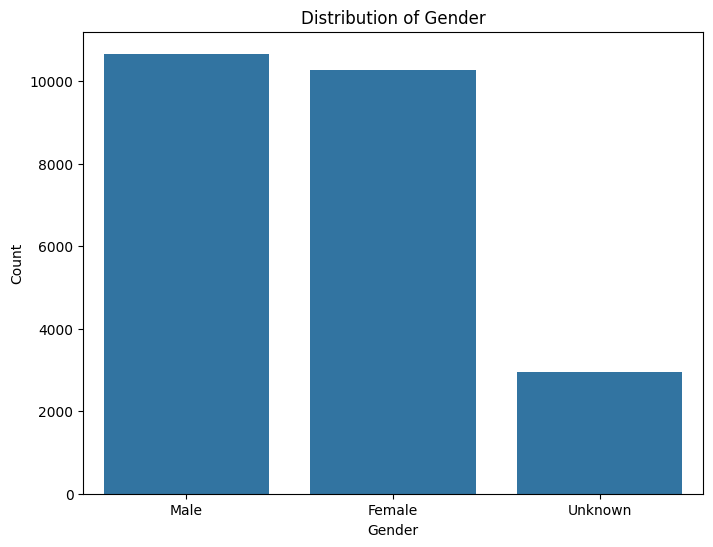

In [9]:
# Calculate the gender distribution
gender_distribution = df['Gender'].value_counts()

# Print the gender distribution
print("Gender Distribution:")
print(gender_distribution)

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

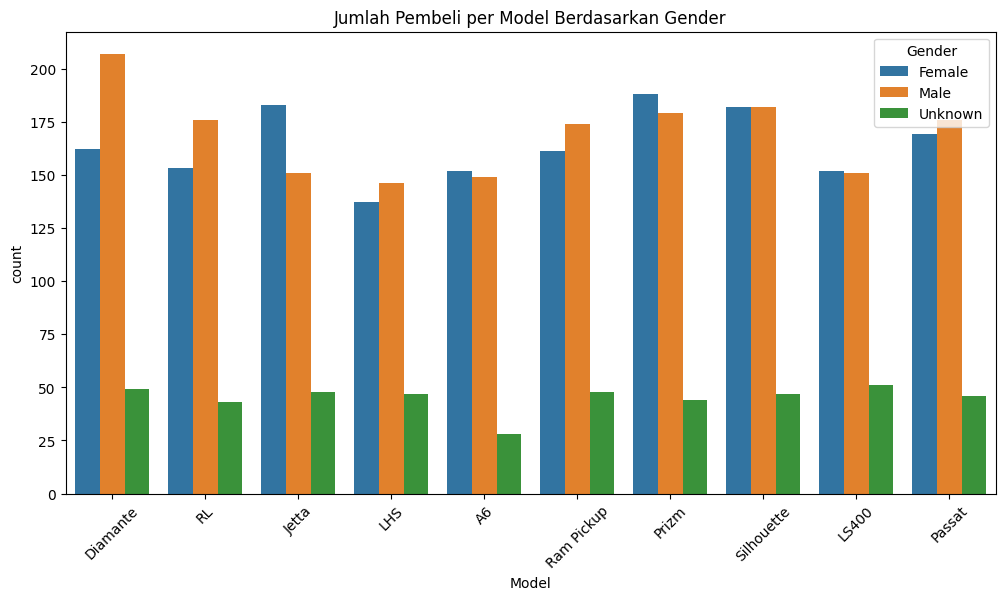

In [10]:
top_models = df['Model'].value_counts().head(10).index
df_top_models = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_models, x='Model', hue='Gender')
plt.title('Jumlah Pembeli per Model Berdasarkan Gender')
plt.xticks(rotation=45)
plt.show()

Rata-rata harga mobil per gender:
    Gender     Price ($)
0   Female  28244.951454
1     Male  28003.466760
2  Unknown  27865.846050


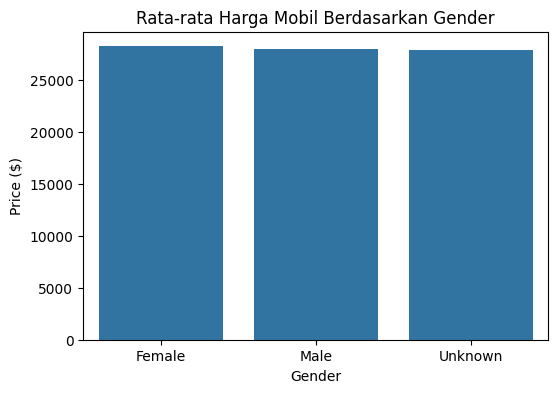

In [11]:
avg_price_gender = df.groupby('Gender')['Price ($)'].mean().reset_index()
print("Rata-rata harga mobil per gender:")
print(avg_price_gender)

# Visualisasi
plt.figure(figsize=(6,4))
sns.barplot(data=avg_price_gender, x='Gender', y='Price ($)')
plt.title('Rata-rata Harga Mobil Berdasarkan Gender')
plt.show()

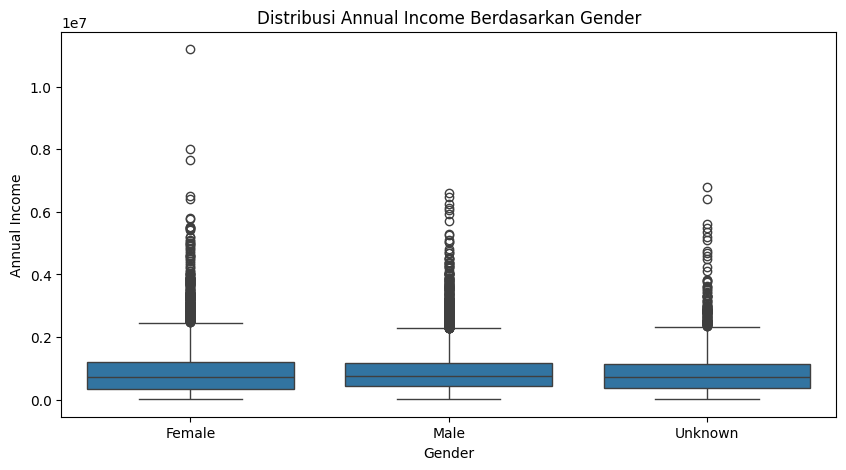

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Gender', y='Annual Income')
plt.title('Distribusi Annual Income Berdasarkan Gender')
plt.show()


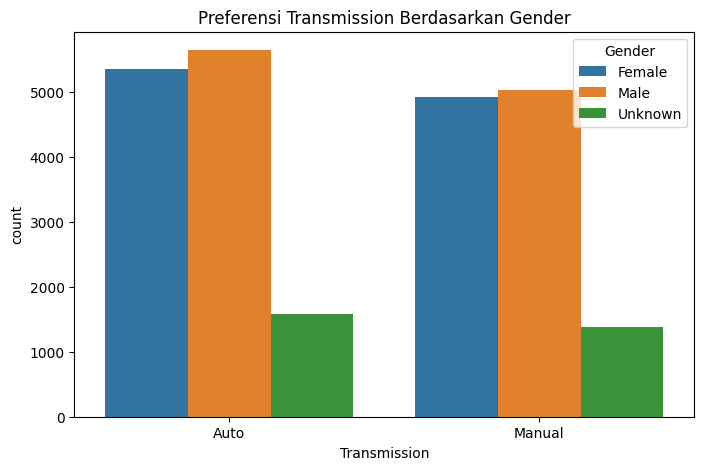

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Transmission', hue='Gender')
plt.title('Preferensi Transmission Berdasarkan Gender')
plt.show()

**Kesimpulan Analisis Gender pada Data Mobil:**
- Proporsi gender pembeli hampir seimbang, jadi tidak ada segmentasi gender yang dominan secara jumlah.

- Preferensi model mobil, body style, dan transmission antara pria dan wanita tidak berbeda signifikan.

- Rata-rata harga mobil yang dibeli pria dan wanita relatif sama, tidak ada gap harga berarti antar gender.

- Distribusi annual income berdasarkan gender juga mirip, tidak ada perbedaan income yang mencolok.



**Income Analysis**

In [14]:
df['Annual Income'].value_counts().head(10)

,count
Annual Income,
13500,5273
1100000,162
600000,160
800000,151
1300000,148
1200000,142
650000,141
1000000,133
900000,132


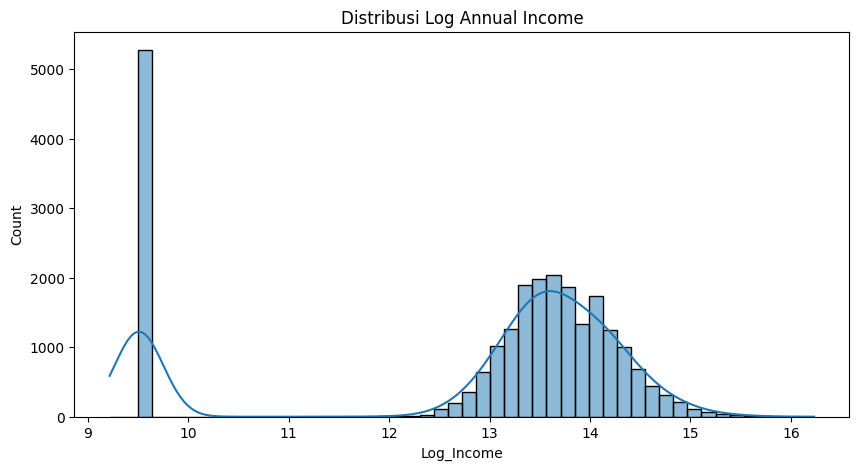

In [15]:
df['Log_Income'] = np.log1p(df['Annual Income'])

plt.figure(figsize=(10,5))
sns.histplot(df['Log_Income'], bins=50, kde=True)
plt.title('Distribusi Log Annual Income')
plt.show()

In [16]:
df[df['Annual Income'] <= 20000][['Annual Income', 'Price ($)', 'Customer Name']]

,Annual Income,Price ($),Customer Name
0,13500,26000,Geraldine
3,13500,14000,Giselle
7,13500,42000,Graham
9,13500,15000,Grayson
10,13500,31000,Gregory
...,...,...,...
23888,13500,28000,Ludivine
23892,13500,18000,Shoshana
23899,13500,62000,Yuna
23901,13500,12000,Martin


In [17]:
df[df['Annual Income'] <= 20000]['Dealer_Name'].value_counts()

,count
Dealer_Name,
Tri-State Mack Inc,291
Ryder Truck Rental and Leasing,286
Rabun Used Car Sales,283
Saab-Belle Dodge,283
Progressive Shippers Cooperative Association No,280
Race Car Help,274
Scrivener Performance Engineering,272
U-Haul CO,272
Suburban Ford,267


In [18]:
# Drop income 13500
df_clean = df[df['Annual Income'] > 13500]
df_clean['Annual Income'].describe()

,Annual Income
count,1.863200e+04
mean,1.062198e+06
std,6.500163e+05
min,2.400000e+04
25%,6.380000e+05
50%,8.800000e+05
75%,1.310000e+06
max,1.120000e+07


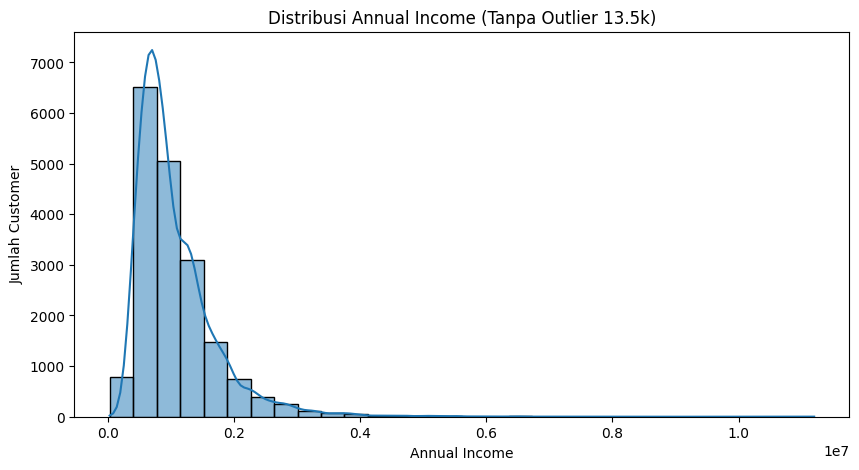

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['Annual Income'], bins=30, kde=True)
plt.title('Distribusi Annual Income (Tanpa Outlier 13.5k)')
plt.xlabel('Annual Income')
plt.ylabel('Jumlah Customer')
plt.show()

In [20]:
# Buat kategori income
bins = [0, 500_000, 1_000_000, df_clean['Annual Income'].max()]
labels = ['Low', 'Middle', 'High']

df_clean['Income Segment'] = pd.cut(df_clean['Annual Income'], bins=bins, labels=labels)
print(df_clean['Income Segment'].value_counts())

Income Segment
Middle    8875
High      7548
Low       2209
Name: count, dtype: int64


/tmp/ipython-input-20-1357838308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Income Segment'] = pd.cut(df_clean['Annual Income'], bins=bins, labels=labels)


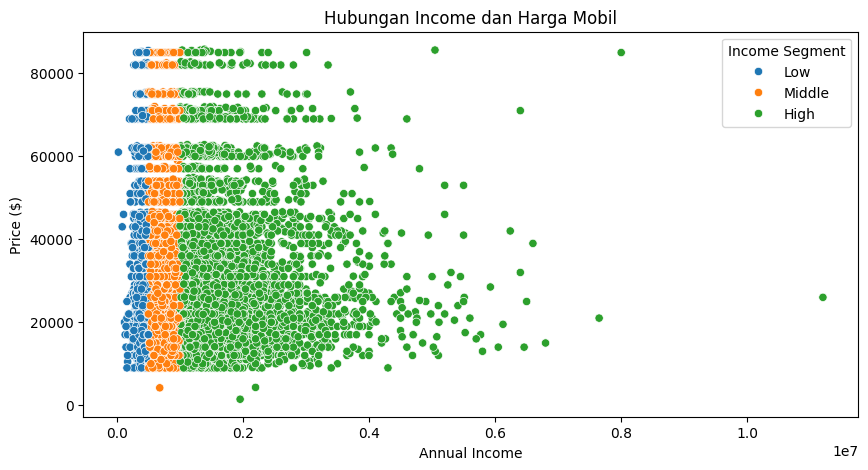

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x='Annual Income', y='Price ($)', hue='Income Segment')
plt.title('Hubungan Income dan Harga Mobil')
plt.show()

In [22]:
correlation = df_clean[['Annual Income', 'Price ($)']].corr(method='pearson')
print(correlation)


               Annual Income  Price ($)
Annual Income       1.000000   0.010617
Price ($)           0.010617   1.000000


In [23]:
df_clean['Annual Income'].value_counts()

,count
Annual Income,
1100000,162
600000,160
800000,151
1300000,148
1200000,142
...,...
1354000,1
678913,1
1124000,1


In [24]:
df_clean['Annual Income'].value_counts().sort_index()

,count
Annual Income,
24000,1
85000,1
106000,1
121000,1
131000,1
...,...
6600000,1
6800000,1
7650000,1


Income 5 digit hanya 2 orang → artinya data income sangat terkonsentrasi di level menengah ke atas (6 digit ke atas).

Korelasi income dengan harga mobil = 0.01

Artinya tidak ada hubungan signifikan antara income dan harga mobil yang dibeli.

 **Interpretasi:**

Banyak orang dengan income tinggi beli mobil biasa-biasa saja.

Bisa jadi pembelian tidak bergantung pada income (mungkin karena kredit, perusahaan yang beli, atau data income tidak akurat).



**Region Analysis**

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


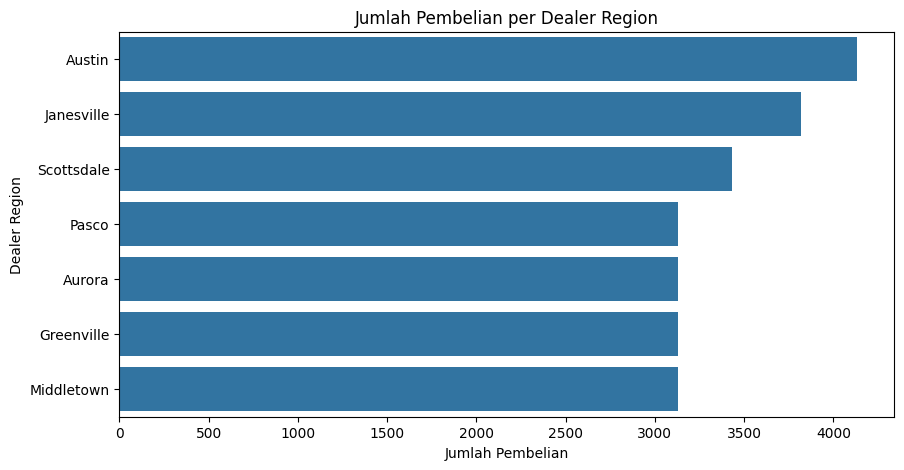

In [25]:
region_counts = df['Dealer_Region'].value_counts()
print(region_counts)

# Visualisasi
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Dealer_Region', order=region_counts.index)
plt.title('Jumlah Pembelian per Dealer Region')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Dealer Region')
plt.show()

Austin (3,210) adalah region dengan pembelian mobil terbanyak,diikuti oleh Janesville (2,983) dan Scottsdale (2,651).

Pasco, Aurora, Middletown, dan Greenville berada di kisaran yang hampir setara, berarti mereka punya potensi setara.


**Rekomendasi:**

- Untuk Austin & Janesville:
Fokuskan stok mobil populer dan mahal di sini.
Bisa jadi target lokasi untuk uji coba promo model baru atau fitur baru.

- Karena angkanya sangat mirip, kamu bisa eksperimen bandingkan strategi.
Misalnya: di Pasco push SUV lebih banyak, di Greenville push hatchback atau city car

Dealer_Region
Austin        28341.603628
Aurora        28334.626837
Greenville    28180.819054
Pasco         28119.039923
Scottsdale    27954.958928
Middletown    27856.338875
Janesville    27833.350955
Name: Price ($), dtype: float64


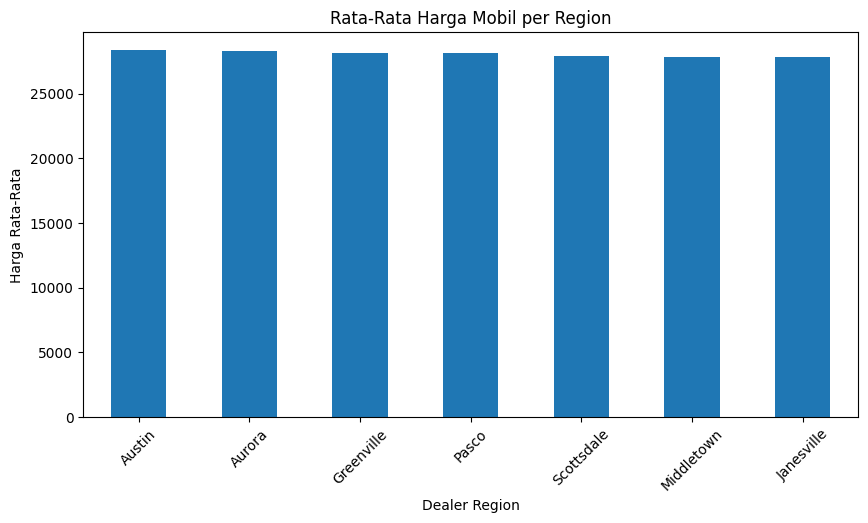

In [26]:
avg_price_region = df.groupby('Dealer_Region')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_region)

# Visualisasi
plt.figure(figsize=(10,5))
avg_price_region.plot(kind='bar')
plt.title('Rata-Rata Harga Mobil per Region')
plt.ylabel('Harga Rata-Rata')
plt.xlabel('Dealer Region')
plt.xticks(rotation=45)
plt.show()

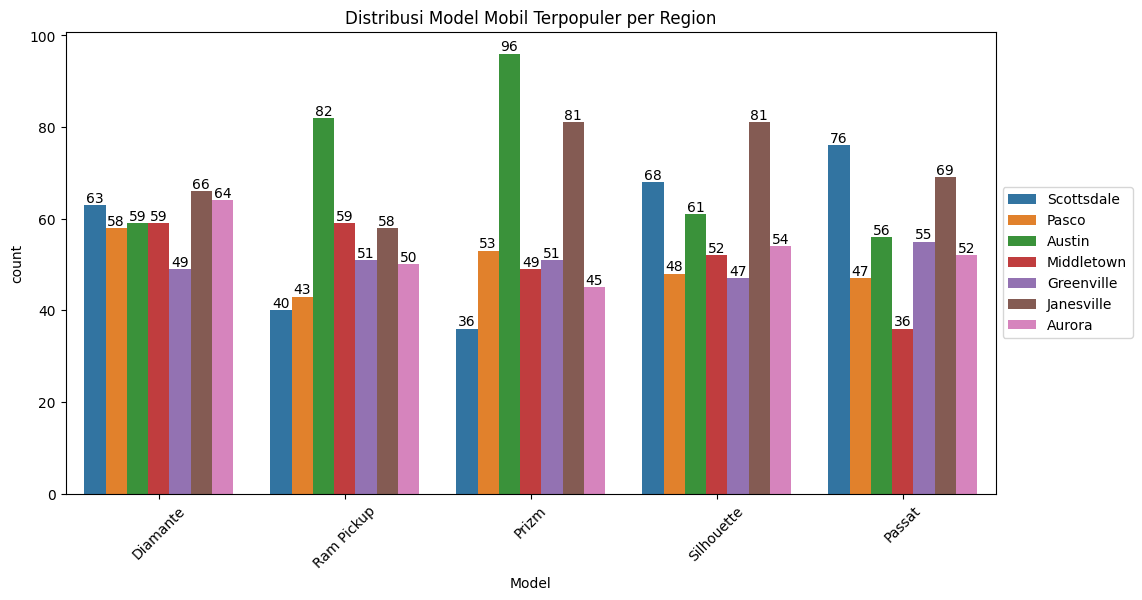

In [27]:
top_models = df['Model'].value_counts().head(5).index
df_top_model_region = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top_model_region, x='Model', hue='Dealer_Region')
plt.title('Distribusi Model Mobil Terpopuler per Region')
plt.xticks(rotation=45)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

1. Model “Prizm” paling laku di Austin (96 unit) dan Janesville (81 unit)
Ini jadi sinyal kuat bahwa Prizm cocok diprioritaskan di dua wilayah itu.

2. “Ram Pickup” tertinggi di Austin (82) dan Middletown (59)
Pickup ini populer di Austin — bisa jadi karena kebutuhan kendaraan besar (area suburban/niaga).

Tapi di Scottsdale dan Pasco relatif rendah (40-an) → stok bisa dikurangi di sana.

3. “Silhouette” dan “Passat” paling kuat di Janesville dan Scottsdale
Silhouette di Janesville = 81, Scottsdale = 68

Passat di Janesville = 69, Scottsdale = 76

Artinya: selera mirip di dua region ini → bisa satukan strategi distribusi/promosi untuk dua wilayah itu.

4. Model “Diamante” distribusinya paling merata
Semua region di kisaran 58–66 unit

Artinya ini model yang stabil permintaannya dan bisa jadi stok default.



| Region         | Model Terkuat          | Insight                                                             |
| -------------- | ---------------------- | ------------------------------------------------------------------- |
| **Austin**     | Prizm, Ram Pickup      | Region dengan selera mobil besar dan utilitas tinggi                |
| **Janesville** | Prizm, Silhouette      | Selera ke arah kendaraan keluarga & compact                         |
| **Scottsdale** | Passat, Silhouette     | Cenderung suka mobil Eropa/jalanan kota                             |
| **Middletown** | Ram Pickup, Silhouette | Kombinasi kendaraan keluarga dan pickup — target suburban           |
| **Aurora**     | Diamante               | Tidak terlalu menonjol, permintaan stabil semua model               |
| **Pasco**      | Diamante, Prizm        | Sedikit condong ke sedan stabil, bukan pickup                       |
| **Greenville** | Passat, Ram Pickup     | Mirip Austin dalam pickup, tapi model Eropa juga kuat (Passat = 55) |


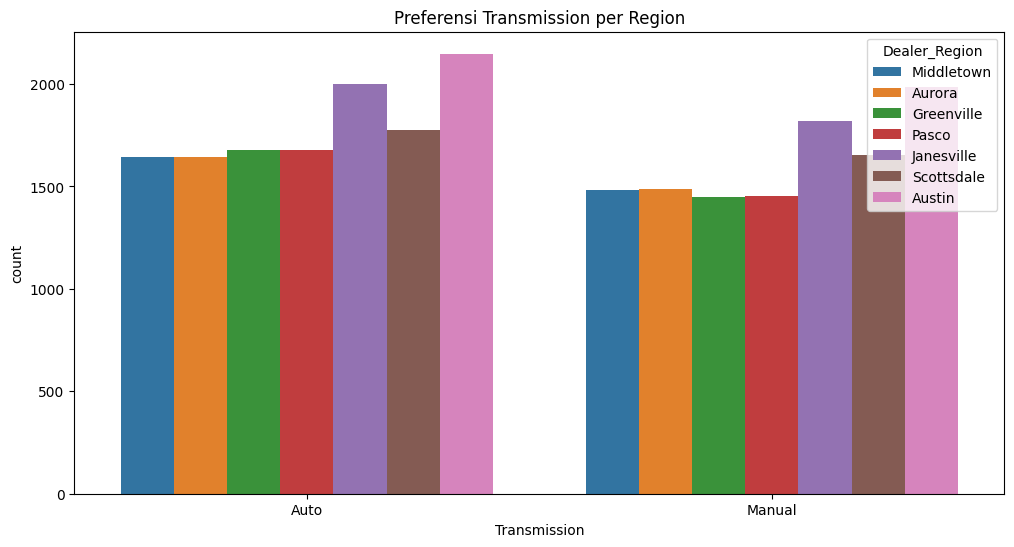

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Transmission', hue='Dealer_Region')
plt.title('Preferensi Transmission per Region')
plt.show()


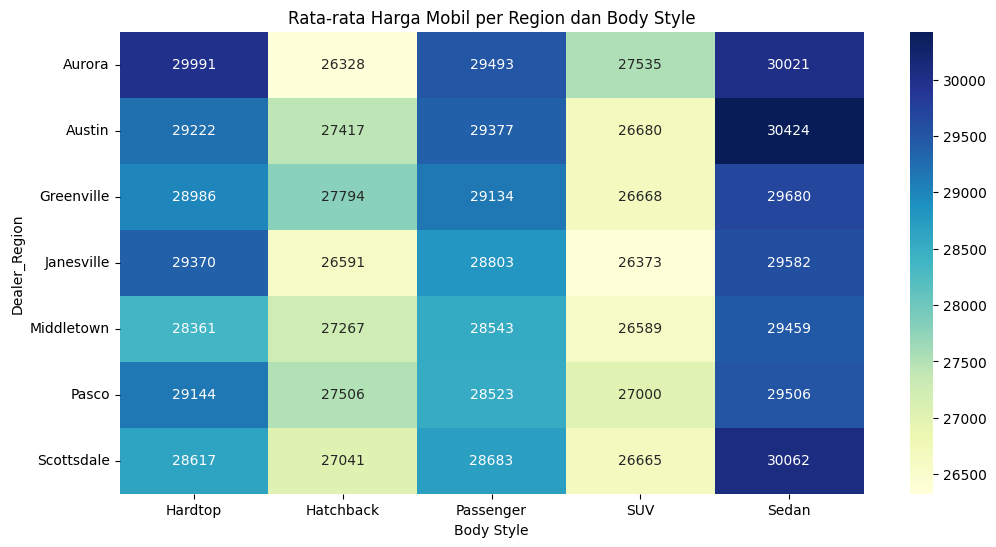

In [29]:
pivot = df.pivot_table(index='Dealer_Region', columns='Body Style', values='Price ($)', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Rata-rata Harga Mobil per Region dan Body Style')
plt.show()


In [30]:
region_company_counts = df.groupby(['Dealer_Region', 'Company'])['Car_id'].count().reset_index()
region_company_counts = region_company_counts.rename(columns={'Car_id': 'Count'})

top_companies = df['Company'].value_counts().head(10).index
region_company_top = region_company_counts[region_company_counts['Company'].isin(top_companies)]


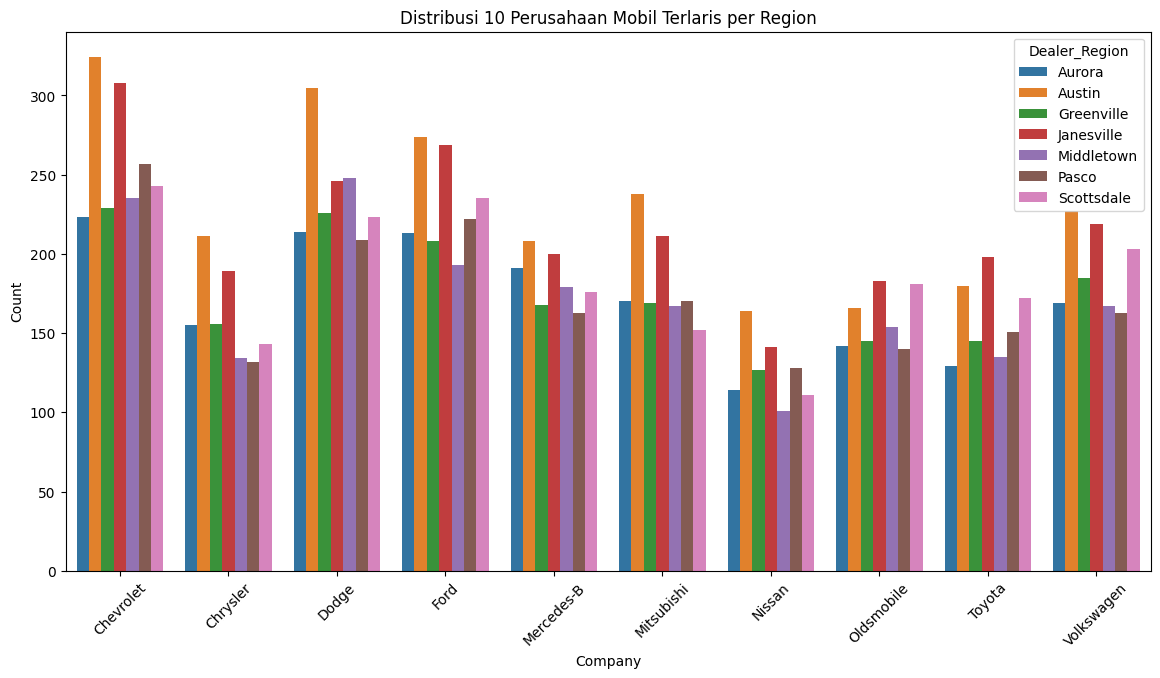

In [31]:
plt.figure(figsize=(14,7))
sns.barplot(data=region_company_top, x='Company', y='Count', hue='Dealer_Region')
plt.title('Distribusi 10 Perusahaan Mobil Terlaris per Region')
plt.xticks(rotation=45)
plt.show()


| Region         | Brand Dominan                   | Catatan Strategis                                              |
| -------------- | ------------------------------- | -------------------------------------------------------------- |
| **Austin**     | Chevrolet, Dodge, Ford          | Fokus pada brand Amerika besar                                 |
| **Janesville** | Chevrolet, Ford, VW, Mitsubishi | Kombinasi kuat US + Jepang → cocok untuk promosi hybrid lineup |
| **Middletown** | Dodge                           | Brand lain drop → review distribusi brand minor                |
| **Pasco**      | Chevrolet, Ford, Dodge          | Stabil dan konsisten                                           |
| **Scottsdale** | Ford, Chevy, VW                 | Brand Jepang lemah → perbaiki dukungan Nissan, Toyota          |
| **Aurora**     | Semua seimbang                  | Cocok untuk eksperimen kampanye brand                          |
| **Greenville** | Stabil antar brand              | Cocok untuk stok fleksibel                                     |


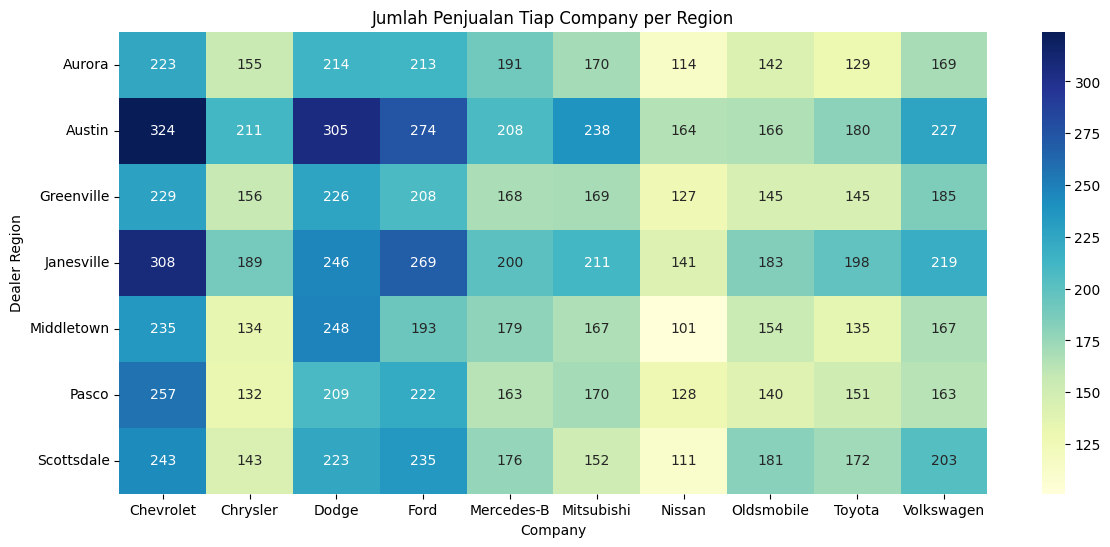

In [32]:
pivot = region_company_top.pivot_table(index='Dealer_Region', columns='Company', values='Count', fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Jumlah Penjualan Tiap Company per Region')
plt.ylabel('Dealer Region')
plt.xlabel('Company')
plt.show()


**Transmission Preference**

Transmission
Auto      12571
Manual    11335
Name: count, dtype: int64


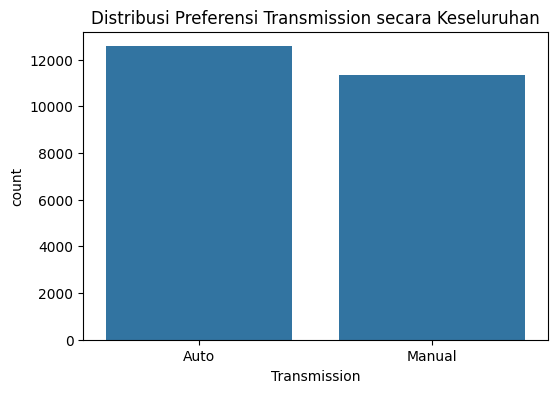

In [33]:
transmission_counts = df['Transmission'].value_counts()
print(transmission_counts)

# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Transmission')
plt.title('Distribusi Preferensi Transmission secara Keseluruhan')
plt.show()


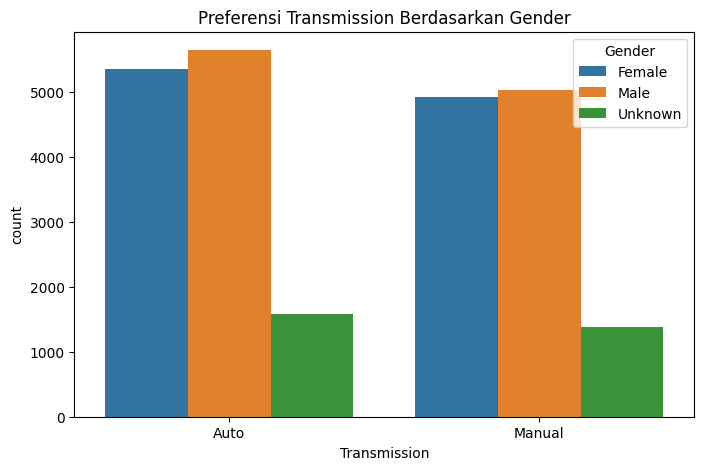

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Transmission', hue='Gender')
plt.title('Preferensi Transmission Berdasarkan Gender')
plt.show()

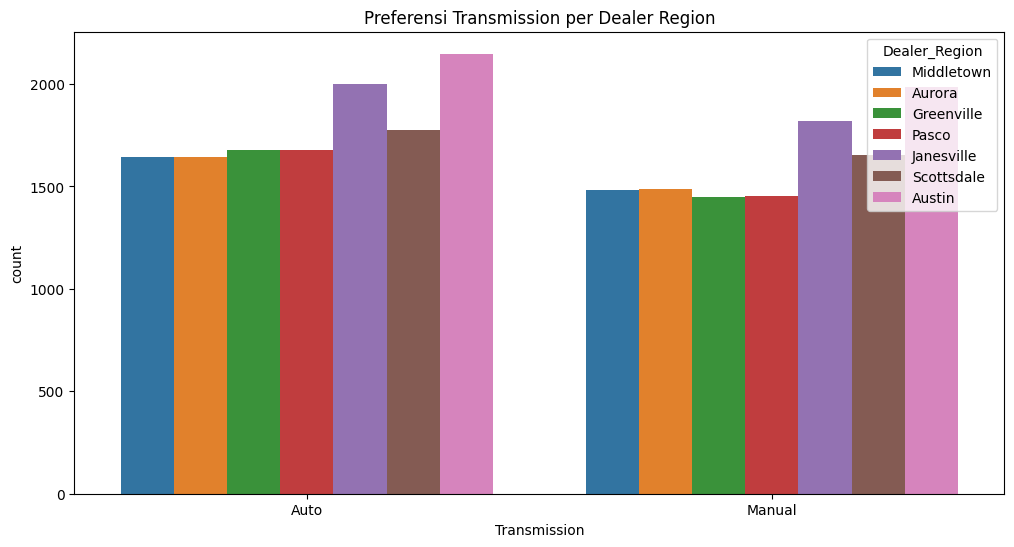

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Transmission', hue='Dealer_Region')
plt.title('Preferensi Transmission per Dealer Region')
plt.show()

Crosstab Transmission vs Model:
Transmission  Auto  Manual
Model                     
3-Sep          171       0
3000GT         156     147
300M           243       0
323i           223      37
328i           127      79
...            ...     ...
Viper          192      48
Voyager         38     143
Windstar        99      22
Wrangler        95      69
Xterra          74      18

[154 rows x 2 columns]


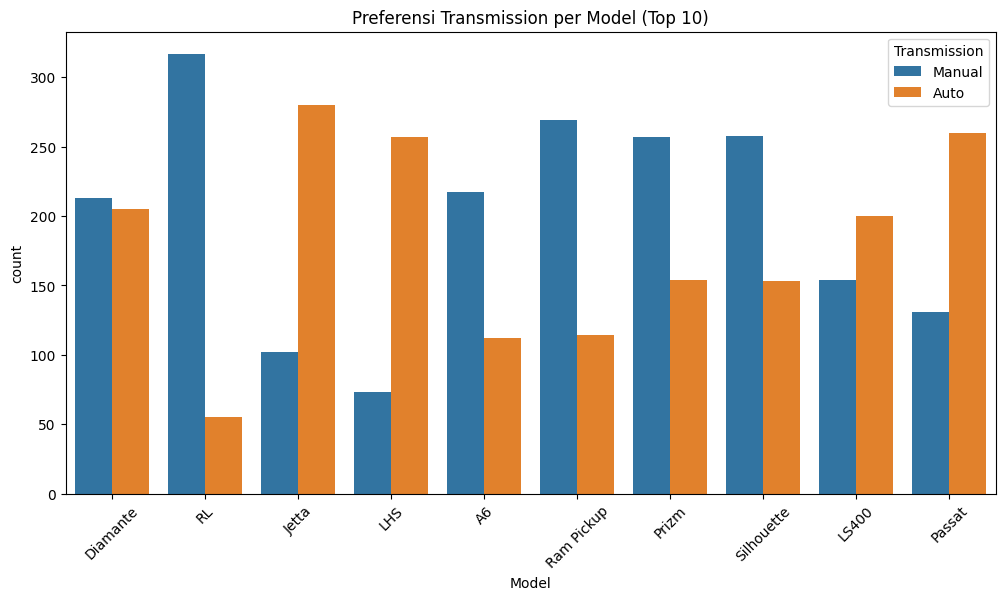

In [36]:
trans_model = pd.crosstab(df['Model'], df['Transmission'])
print("Crosstab Transmission vs Model:")
print(trans_model)

# Visualisasi Transmission per Model (top 10 model berdasarkan total pembelian)
top_models = df['Model'].value_counts().head(10).index
df_top_models = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_models, x='Model', hue='Transmission')
plt.title('Preferensi Transmission per Model (Top 10)')
plt.xticks(rotation=45)
plt.show()

| Segment          | Model                                 | Aksi stok & marketing                                                                  |
| ---------------- | ------------------------------------- | -------------------------------------------------------------------------------------- |
| **Auto‑heavy**   | LHS, Jetta, Passat, LS400             | Lebihkan varian Auto.                  |
| **Balanced**     | Diamante                              | Jaga porsi 50‑50; gunakan data regional sebelum memutuskan stok.                       |
| **Manual‑heavy** | RL, Ram Pickup, A6, Prizm, Silhouette | Fokus varian Manual. |


Crosstab Transmission vs Company:
Transmission  Auto  Manual
Company                   
Acura          293     396
Audi           164     304
BMW            458     332
Buick          285     154
Cadillac       373     279
Chevrolet      772    1047
Chrysler       855     265
Dodge         1048     623
Ford           763     851
Honda          338     370
Hyundai          0     264
Infiniti       128      67
Jaguar          51     129
Jeep           181     182
Lexus          471     331
Lincoln        161     331
Mercedes-B     454     831
Mercury        486     388
Mitsubishi     682     595
Nissan         470     416
Oldsmobile     569     542
Plymouth       299     318
Pontiac        507     289
Porsche        200     161
Saab           177      33
Saturn         375     211
Subaru         273     132
Toyota         519     591
Volkswagen     899     434
Volvo          320     469


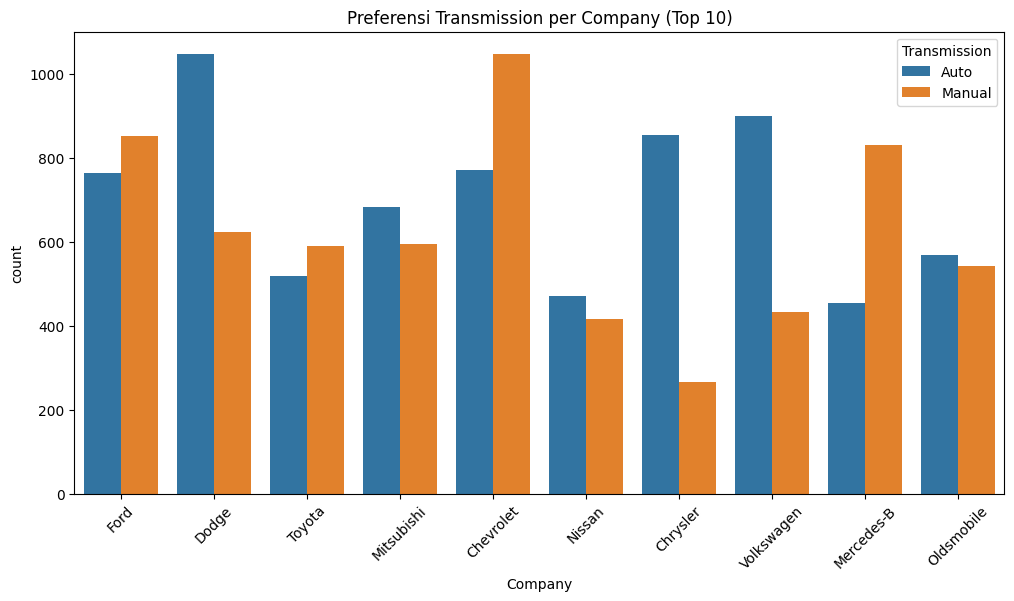

In [37]:
trans_company = pd.crosstab(df['Company'], df['Transmission'])
print("Crosstab Transmission vs Company:")
print(trans_company)

# Visualisasi Transmission per Company (top 10 company berdasarkan total pembelian)
top_companies = df['Company'].value_counts().head(10).index
df_top_companies = df[df['Company'].isin(top_companies)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_companies, x='Company', hue='Transmission')
plt.title('Preferensi Transmission per Company (Top 10)')
plt.xticks(rotation=45)
plt.show()

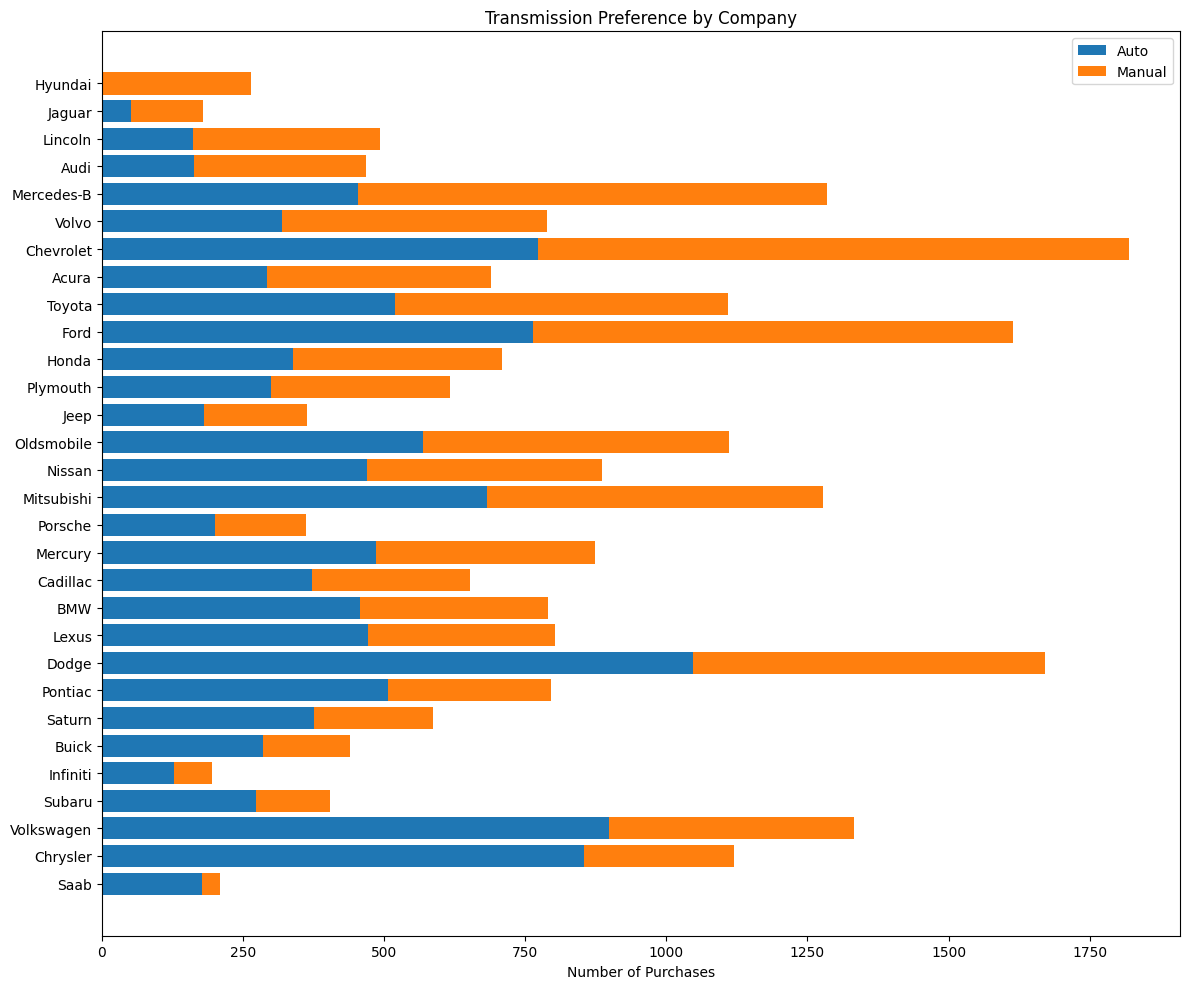

In [38]:
df_tc = trans_company.rename_axis('Company').reset_index()

# Hitung total & share
df_tc['Total'] = df_tc['Auto'] + df_tc['Manual']
df_tc['AutoShare'] = df_tc['Auto'] / df_tc['Total']

# Urutkan supaya grafik enak dibaca
df_sorted = df_tc.sort_values('AutoShare', ascending=False)

# ---------- plotting ----------


fig, ax = plt.subplots(figsize=(12,10))
ax.barh(df_sorted['Company'], df_sorted['Auto'], label='Auto')
ax.barh(df_sorted['Company'], df_sorted['Manual'],
        left=df_sorted['Auto'], label='Manual')

ax.set_xlabel('Number of Purchases')
ax.set_title('Transmission Preference by Company')
ax.legend()
plt.tight_layout()
plt.show()

Dominan Auto:

|  Company                             |  Auto Share  | Catatan Singkat                                   |
| ------------------------------------ | ------------ | ------------------------------------------------- |
| **Saab**                             |  84 %        | Kecil volume, tapi jelas pro‑Auto.                |
| **Chrysler**                         |  76 %        | Sangat dominan Auto → stok Manual minim saja.     |
| **Volkswagen**                       |  67 %        | Jelas condong Auto, beda dengan Audi.             |
| **Subaru**                           |  67 %        | Anehnya pro‑Auto, berbeda stereotip ‘enthusiast’. |
| **Infiniti**                         |  66 %        | Luxury buyer cenderung Auto.                      |
| Buick, Porsche, Lexus, Cadillac, BMW |  ≈ 60 %      | Luxury/comfort segment wajar lebih pilih Auto.    |


Balanced:

|  Company                                                                       |  Auto Share  |
| ------------------------------------------------------------------------------ | ------------ |
| Acura, Nissan, Mitsubishi, Pontiac, Dodge, Honda, Toyota, Oldsmobile, Plymouth | 45‑55 %      |


Dominan Manual:

|  Company        |  Manual Share  | Catatan Singkat                                                                    |
| --------------- | -------------- | ---------------------------------------------------------------------------------- |
| **Hyundai**     |  100 %         | Data Auto = 0 → hanya varian Manual tercatat. Perlu dicek apakah data Auto hilang. |
| **Jaguar**      |  72 %          | Enthusiast / klasik? stok Manual tinggi.                                           |
| **Lincoln**     |  67 %          | Luxury tapi konsumen suka Manual (agak unik).                                      |
| **Mercedes‑B**  |  65 %          | Berlawanan dugaan, pastikan stok Manual cukup.                                     |
| **Volvo**       |  59 %          | Hampir 60 % Manual.                                                                |
| Chevrolet, Ford |  ≈ 58‑53 %     | Volume tinggi → supply Manual jangan sampai kurang.                                |


**Color**

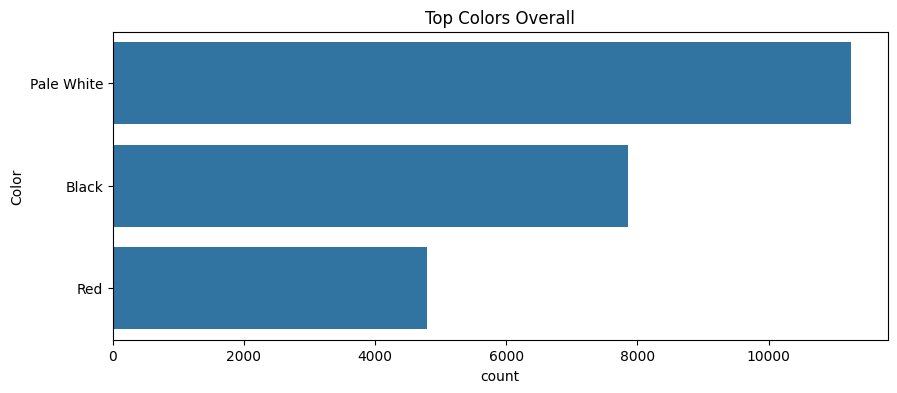

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, y='Color', order=df['Color'].value_counts().index)
plt.title('Top Colors Overall')
plt.show()

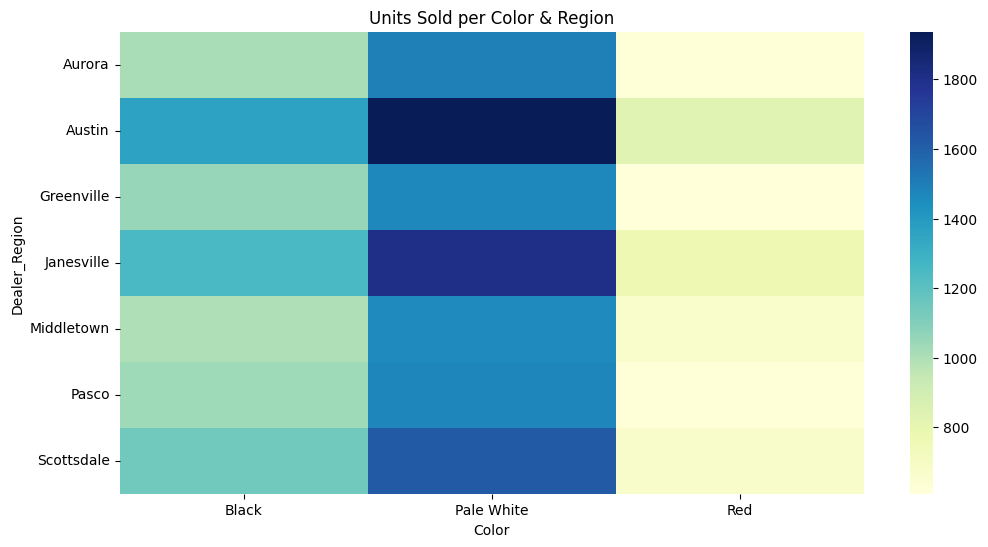

In [40]:
color_region = pd.crosstab(df['Dealer_Region'], df['Color'])
plt.figure(figsize=(12,6))
sns.heatmap(color_region, cmap='YlGnBu', annot=False)
plt.title('Units Sold per Color & Region')
plt.show()

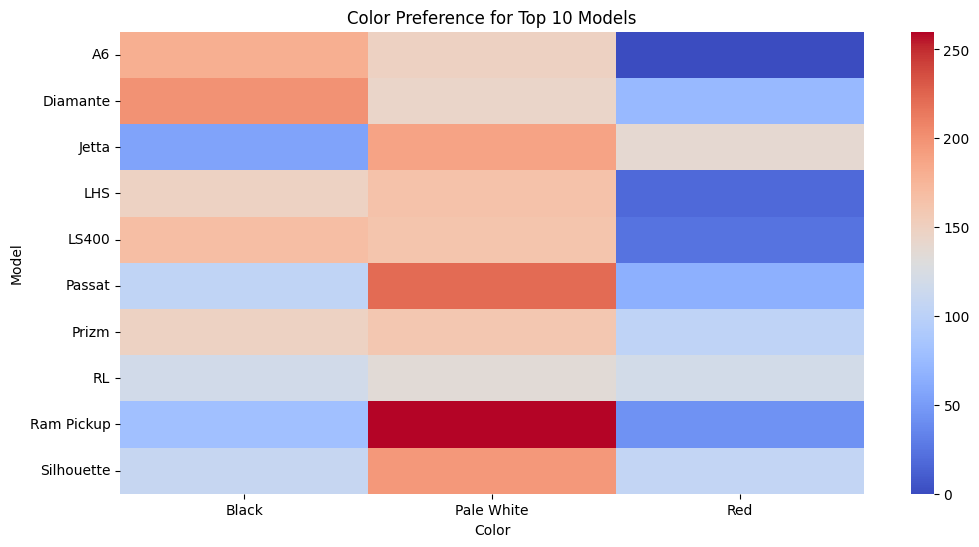

In [41]:
top_models = df['Model'].value_counts().head(10).index
cm_top = pd.crosstab(df[df['Model'].isin(top_models)]['Model'], df['Color'])
plt.figure(figsize=(12,6))
sns.heatmap(cm_top, cmap='coolwarm', annot=False)
plt.title('Color Preference for Top 10 Models')
plt.show()

Insight:

- Fokus warna Pale White untuk sebagian besar model karena dominan.

- Model seperti Diamante, Jetta, RL, Prizm, Silhouette perlu perhatian khusus pada warna Merah karena proporsinya cukup besar.